## **ตัวอย่างการทดสอบค่าเฉลี่ยและความแปรปรวนกับชุดข้อมูล**



จากชุดข้อมูล housePrice.csv ซึ่งเป็นข้อมูลราคาอสังหาริมทรัพย์ของเมืองย่านธุรกิจแห่งหนึ่ง โดยแต่ละคอลัมน์มีรายละเอียดดังนี้

trans_date: วันที่ได้มีการซื้อขาย (yyyy/mm)  
age: อายุของที่อยู่อาศัย (ปี)  
age_group: การจัดกลุ่มที่อยู่อาศัยตามอายุ (new: 1-10 ปี, moderate: >10-25 ปี, old: >25 ปี)  
mrt_dist: ระยะห่างจากสถานีรถไฟฟ้า mrt (เมตร)   
con_num:  จำนวนร้านสะดวกซื้อในบริเวณ 500 เมตร (ร้าน)  
latitude:  ละติจูด  
longitude:  ลองจิจูด  
price: ราคา (*10000 ดอลลาร์)  


*จงตอบคำถามข้อ 1 - 4*

\
คำสั่ง import library:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [ ]:
%pip install scikit-posthocs

\
คำสั่งการอ่านชุดข้อมูล:

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/housePrice.csv")
df.head()

,trans_date,age,age_group,mrt_dist,con_num,latitude,longitude,price
0,2012/10,0.0,new,338.9679,9,24.96853,121.54413,50.8
1,2012/10,0.0,new,208.3905,6,24.95618,121.53844,45.7
2,2012/10,0.0,new,185.4296,0,24.97110,121.53170,52.2
3,2012/10,0.0,new,208.3905,6,24.95618,121.53844,44.0
4,2012/10,3.2,new,489.8821,8,24.97017,121.54494,43.2


### \*\*หมายเหตุ  
ในทางปฏิบัติ การนำวิธีทางสถิติไปใช้ในการวิเคราะห์ค่า μ ข้อมูลจริง หากไม่ทราบ σ จะพิจารณาใช้การแจกแจงแบบ t แม้ว่าตัวอย่างจะมีขนาดมากกว่า 30 ก็ตาม  
***สำหรับการสอบให้นิสิตยึดตามทฤษฎีที่ได้เรียน***

\
### 1. ค่าเฉลี่ยราคา(price) ของกลุ่มที่อยู่อาศัยอายุน้อย(new) มีค่ามากกว่า 45 (*10000 ดอลลาร์) อย่างมีนัยสำคัญหรือไม่ที่ระดับนัยสำคัญ 0.05 หากกำหนดให้ราคาของที่อยู่อาศัยมีการแจกแจงแบบปกติ

- หากหาค่าเฉลี่ยของราคาจะได้ค่า 46.61 แต่ค่าส่วนเบี่ยงเบนมาตราฐานมีค่ามาก ซึ่งแสดงว่าข้อมูลมีการกระจายมาก

In [ ]:
np.mean(df.price[df.age_group=="new"]) #หรือ df.price[df.age_group=="new"].mean()

46.608181818181826

In [ ]:
np.std(df.price[df.age_group=="new"], ddof=1) #หรือ df.price[df.age_group=="new"].std(ddof=1)

12.030886335664746

- ตั้งสมมติฐาน

กำหนดให้ค่า μ คือค่าเฉลี่ยราคาของกลุ่มที่อยู่อาศัยอายุน้อย

$H_{0}$: μ $\le$ 45  
$H_{1}$: μ $>$ 45

> ใช้ Z

In [4]:
df.price[df.age_group=="new"].size

110

In [5]:
Z_cal, p_val_z = ztest(x1=df.price[df.age_group=="new"],
                       value=45,
                       alternative="larger")
Z_cal, p_val_z

(1.4019543309751223, 0.0804644423402599)

In [9]:
z_crit = stats.norm.isf(0.05)
z_crit

1.6448536269514729

**ค่า p-val > 0.05 จึงยอมรับ $H_{0}$ และปฏิเสธ $H_{1}$ นั่นคือ ค่าเฉลี่ยราคาของกลุ่มที่อยู่อาศัยอายุน้อยมีค่าน้อยกว่าหรือเท่ากับ 45 (\*10000 ดอลลาร์)**

> ใช้ t

In [10]:
t_cal, p_val = stats.ttest_1samp(a=df.price[df.age_group=="new"],
                                 popmean=45,
                                 alternative="greater") # popmean คือค่าที่ต้องการทดสอบ
t_cal, p_val

(1.4019543309751226, 0.08188511166737057)

**ค่า p-val > 0.05 จึงยอมรับ $H_{0}$ และปฏิเสธ $H_{1}$ นั่นคือ ค่าเฉลี่ยราคาของกลุ่มที่อยู่อาศัยอายุน้อยมีค่าน้อยกว่าหรือเท่ากับ 45 (\*10000 ดอลลาร์)**

\
### 2. ค่าเฉลี่ยราคา(price) ของกลุ่มที่อยู่อาศัยอายุน้อย(new) แตกต่างจากราคาของกลุ่มที่อยู่อาศัยอายุปานกลาง(moderate) อย่างมีนัยสำคัญหรือไม่ที่ระดับนัยสำคัญ 0.05 หากกำหนดให้ราคาของที่อยู่อาศัยมีการแจกแจงแบบปกติ และความแปรปรวนราคาใน 2 กลุ่มมีค่าเท่ากัน

- แสดงค่าเฉลี่ยราคาของแต่ละกลุ่ม

In [ ]:
df.filter(['price', 'age_group']).groupby('age_group').mean()

,price
age_group,
moderate,33.851872
new,46.608182
old,36.466667


- ตั้งสมมติฐาน

กำหนดให้ค่า $μ_{1}$: คือค่าเฉลี่ยราคาของกลุ่มที่อยู่อาศัยอายุน้อย และ $μ_{2}$: คือค่าเฉลี่ยราคาของกลุ่มที่อยู่อาศัยอายุปานกลาง

$H_{0}$: $μ_{1}$ $=$ $μ_{2}$  
$H_{1}$: $μ_{1}$ $\neq$ $μ_{2}$

> ใช้ Z

In [ ]:
n1 = df.price[df.age_group=="new"].size
n2 = df.price[df.age_group=="moderate"].size
n1, n2

(110, 187)

In [ ]:
x_bar1 = np.mean(df.price[df.age_group=="new"])
x_bar2 = np.mean(df.price[df.age_group=="moderate"])
s1_2 = np.var(df.price[df.age_group=="new"], ddof=1)
s2_2 = np.var(df.price[df.age_group=="moderate"], ddof=1)

In [ ]:
z_cal = (x_bar1 - x_bar2) / np.sqrt((s1_2/n1) + (s2_2/n2))
z_cal

8.606281382854645

In [ ]:
p_val_z = 2*stats.norm.sf(abs(z_cal))
p_val_z

7.546887588881558e-18

**ค่า p-val $\le$ 0.05 ปฏิเสธ $H_{0}$ และยอมรับ $H_{1}$ นั่นคือ ค่าเฉลี่ยราคา ของกลุ่มที่อยู่อาศัยอายุน้อย แตกต่างจากราคาของกลุ่มที่อยู่อาศัยอายุปานกลาง อย่างมีนัยสำคัญ**

> ใช้ t

In [ ]:
t_cal, p_value = stats.ttest_ind(df.price[df.age_group=="new"], df.price[df.age_group=="moderate"], alternative="two-sided")
t_cal, p_value

(8.462641073468749, 1.2386378981677407e-15)

**ค่า p-val $\le$ 0.05 ปฏิเสธ $H_{0}$ และยอมรับ $H_{1}$ นั่นคือ ค่าเฉลี่ยราคา ของกลุ่มที่อยู่อาศัยอายุน้อย แตกต่างจากราคาของกลุ่มที่อยู่อาศัยอายุปานกลาง อย่างมีนัยสำคัญ**

\
### 3. ค่าเฉลี่ยราคา(price) ของกลุ่มที่อยู่อาศัยอายุปานกลาง(moderate) แตกต่างจากราคาของกลุ่มที่อยู่อาศัยอายุมาก(old) อย่างมีนัยสำคัญหรือไม่ที่ระดับนัยสำคัญ 0.05 หากกำหนดให้ราคาของที่อยู่อาศัยมีการแจกแจงแบบปกติ และความแปรปรวนราคาใน 2 กลุ่มมีค่าเท่ากัน

- แสดงค่าเฉลี่ยราคาของแต่ละกลุ่ม

In [ ]:
df.filter(['price', 'age_group']).groupby('age_group').mean()

- ตั้งสมมติฐาน

กำหนดให้ค่า $μ_{1}$: คือค่าเฉลี่ยราคาของกลุ่มที่อยู่อาศัยอายุปานกลาง และ $μ_{2}$: คือค่าเฉลี่ยราคาของกลุ่มที่อยู่อาศัยอายุมาก

$H_{0}$: $μ_{1}$ $=$ $μ_{2}$  
$H_{1}$: $μ_{1}$ $\neq$ $μ_{2}$

> ใช้ Z

In [ ]:
n1 = df.price[df.age_group=="moderate"].size
n2 = df.price[df.age_group=="old"].size
n1, n2

(187, 117)

In [ ]:
x_bar1 = np.mean(df.price[df.age_group=="moderate"])
x_bar2 = np.mean(df.price[df.age_group=="old"])
s1_2 = np.var(df.price[df.age_group=="moderate"], ddof=1)
s2_2 = np.var(df.price[df.age_group=="old"], ddof=1)

In [ ]:
z_cal = (x_bar1 - x_bar2) / np.sqrt((s1_2/n1) + (s2_2/n2))
z_cal

-1.7484864399262139

In [ ]:
p_val_z = 2*stats.norm.sf(abs(z_cal))
p_val_z

0.08037983163022634

**ค่า p-val $>$ 0.05 ยอมรับ $H_{0}$ และปฏิเสธ $H_{1}$ นั่นคือ ค่าเฉลี่ยราคา ของกลุ่มที่อยู่อาศัยอายุปานกลาง ไม่แตกต่างจากราคาของกลุ่มที่อยู่อาศัยอายุมาก**

> ใช้ t

In [ ]:
t_cal, p_value = stats.ttest_ind(df.price[df.age_group=="moderate"], df.price[df.age_group=="old"], alternative="two-sided")
t_cal, p_value

(-1.7407621489654226, 0.0827437447443804)

**ค่า p-val $>$ 0.05 ยอมรับ $H_{0}$ และปฏิเสธ $H_{1}$ นั่นคือ ค่าเฉลี่ยราคา ของกลุ่มที่อยู่อาศัยอายุปานกลาง ไม่แตกต่างจากราคาของกลุ่มที่อยู่อาศัยอายุมาก**

\
#### <font color='blue'>การเปรียบเทียบค่าเฉลี่ยมากกว่า 2 กลุ่มโดยใช้ posthoc_ttest</font>



In [ ]:
import scikit_posthocs as sp

- หาค่า p-value ในคำสั่งเดียว

In [ ]:
sp.posthoc_ttest(df, val_col='price', group_col='age_group')

\
### 4. ความแปรปรวนของราคา(price) ของกลุ่มที่อยู่อาศัยที่มีระยะห่างจากสถานี mrt(mrt_dist)น้อยกว่า 300 เมตร แตกต่างจากกลุ่มที่อยู่อาศัยที่มีระยะห่างจากสถานี mrt มากกว่า 1500 เมตรอย่างมีนัยสำคัญหรือไม่ที่ระดับนัยสำคัญ 0.05 หากกำหนดให้ราคาของที่อยู่อาศัยมีการแจกแจงแบบปกติ

- แสดงความแปรปรวนราคาของกลุ่มที่อยู่อาศัยที่มีระยะห่างจากสถานี mrt น้อยกว่า 300 เมตร

In [11]:
near_mrt = df.price[df.mrt_dist < 300]
near_mrt

1      45.7
2      52.2
3      44.0
5      38.4
6      47.0
       ... 
372    59.6
385    48.0
395    59.0
396    58.1
409    39.4
Name: price, Length: 116, dtype: float64

In [12]:
np.var(near_mrt, ddof=1) # ความแปรปรวน

130.58102848575717

\
- แสดงความแปรปรวนราคาของกลุ่มที่อยู่อาศัยที่มีระยะห่างจากสถานี mrt มากกว่า 1500 เมตร

In [14]:
far_mrt = df.price[df.mrt_dist > 1500]
far_mrt

12     18.6
13     21.8
14     24.8
18     11.6
19     12.9
       ... 
394    31.3
398    24.7
400    18.3
401    11.2
402    20.9
Name: price, Length: 99, dtype: float64

In [15]:
np.var(far_mrt, ddof=1)

47.191038961038956

- เปรียบเทียบการแจกแจงข้อมูลราคาของทั้ง 2 กลุ่ม

In [16]:
df_dist = pd.DataFrame({
        'Distance':np.append(np.repeat('near',len(near_mrt)), np.repeat('far',len(far_mrt))),
        'Price':np.append(near_mrt, far_mrt)
        })
df_dist.head()

,Distance,Price
0,near,45.7
1,near,52.2
2,near,44.0
3,near,38.4
4,near,47.0


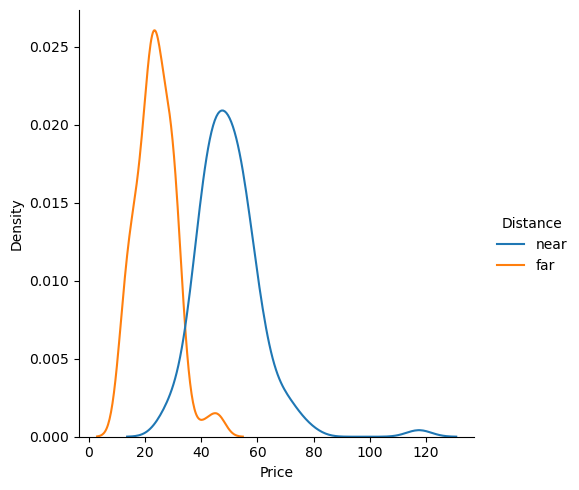

In [17]:
sns.displot(data=df_dist,
            x='Price',
            kind='kde',
            hue='Distance')

- ตั้งสมมติฐาน

กำหนดให้  
> $\sigma_{1}^{2}$: คือค่าความแปรปรวนราคาของกลุ่มที่อยู่อาศัยที่มีระยะห่างจากสถานี mrt น้อยกว่า 300 เมตร  
> $\sigma_{2}^{2}$: คือค่าความแปรปรวนราคาของกลุ่มที่อยู่อาศัยที่มีระยะห่างจากสถานี mrt มากกว่า 1500 เมตร



$H_{0}$: $\sigma_{1}^{2} / \sigma_{2}^{2}$ $=$ 1   
$H_{1}$: $\sigma_{1}^{2} / \sigma_{2}^{2}$ $\neq$ 1

- คำนวณค่า F_cal

In [18]:
v_near = np.var(near_mrt, ddof=1)
v_far = np.var(far_mrt, ddof=1)

f_cal = v_near/v_far
f_cal


2.7670725493788177

- คำนวณค่า F_crit

In [19]:
dfn = df.price[df.mrt_dist < 300].size
dfd = df.price[df.mrt_dist > 1500].size

f_crit_left = stats.f.ppf(0.05/2,
                          dfn=dfn,
                          dfd=dfd)
f_crit_right = stats.f.isf(0.05/2,
                           dfn=dfn,
                           dfd=dfd)

f_crit_left, f_crit_right

(0.6849629193144439, 1.4684514432448335)

- คำนวณค่า p-value

In [20]:
p_val = 2*min(stats.f.sf(f_cal, dfn=dfn, dfd=dfd), stats.f.cdf(f_cal, dfn=dfn, dfd=dfd))
p_val

3.937510699650593e-07

- สรุปผล

**ค่า p-val $\le$ 0.05 ปฏิเสธ $H_{0}$ และยอมรับ $H_{1}$ นั่นคือ ค่าความแปรปรวนราคาของกลุ่มที่อยู่อาศัยที่มีระยะห่างจากสถานี mrt น้อยกว่า 300 เมตร แตกต่างจากค่าความแปรปรวนราคาของกลุ่มที่อยู่อาศัยที่มีระยะห่างจากสถานี mrt มากกว่า 1500 เมตร อย่างมีนัยสำคัญ**

\
- การสลับตัวตั้งตัวหารส่งผลต่อการวิเคราะห์หรือไม่?

In [ ]:
f_cal = v_far/v_near
f_cal

In [ ]:
dfn = df.price[df.mrt_dist > 1500].size
dfd = df.price[df.mrt_dist < 300].size

f_crit_left = stats.f.ppf(0.05/2,
                          dfn=dfn,
                          dfd=dfd)
f_crit_right = stats.f.isf(0.05/2,
                           dfn=dfn,
                           dfd=dfd)

f_crit_left, f_crit_right

In [ ]:
p_val = 2*min(stats.f.sf(f_cal, dfn=dfn, dfd=dfd), stats.f.cdf(f_cal, dfn=dfn, dfd=dfd))
p_val